In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
movies=pd.read_csv("/content/movies.dat",sep="::",engine="python",encoding="ISO-8859-1")
users=pd.read_csv("/content/users.dat",sep="::",engine="python",encoding="ISO-8859-1")
ratings=pd.read_csv("/content/ratings.dat",sep="::",engine="python",encoding="ISO-8859-1")

In [3]:
# movies=movies.drop(columns=["1"])
movies.head(20)

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
5,7,Sabrina (1995),Comedy|Romance
6,8,Tom and Huck (1995),Adventure|Children's
7,9,Sudden Death (1995),Action
8,10,GoldenEye (1995),Action|Adventure|Thriller
9,11,"American President, The (1995)",Comedy|Drama|Romance


In [4]:
# ratings=ratings.drop(columns=["1"])
ratings.head(10)

,1,1193,5,978300760
0,1,661.0,3.0,978302109.0
1,1,914.0,3.0,978301968.0
2,1,3408.0,4.0,978300275.0
3,1,2355.0,5.0,978824291.0
4,1,1197.0,3.0,978302268.0
5,1,1287.0,5.0,978302039.0
6,1,2804.0,5.0,978300719.0
7,1,594.0,4.0,978302268.0
8,1,919.0,4.0,978301368.0
9,1,595.0,5.0,978824268.0


In [5]:
users.head(20)

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [6]:
movies.columns=["MovieIDs","Title_of_Movie","Genres"]

In [7]:
ratings.columns=["UserID","MovieID","Rating","Timestamp"]

In [8]:
users.columns=["UserID","Gender","Age","Occupation","Zip-code"]

In [9]:
movies

,MovieIDs,Title_of_Movie,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [10]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,661.0,3.0,978302109.0
1,1,914.0,3.0,978301968.0
2,1,3408.0,4.0,978300275.0
3,1,2355.0,5.0,978824291.0
4,1,1197.0,3.0,978302268.0
...,...,...,...,...
88824,587,1194.0,4.0,976032549.0
88825,587,1196.0,3.0,976235639.0
88826,587,663.0,1.0,976032312.0
88827,587,1198.0,3.0,976235480.0


In [11]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [12]:
movies.isna().sum()

MovieIDs          0
Title_of_Movie    0
Genres            0
dtype: int64

In [13]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [14]:
ratings.isna().sum()

UserID       0
MovieID      1
Rating       1
Timestamp    1
dtype: int64

In [15]:
sales_rating=pd.concat([movies,ratings,users],axis=1)
sales_rating.head(20)

,MovieIDs,Title_of_Movie,Genres,UserID,MovieID,Rating,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661.0,3.0,978302109.0,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914.0,3.0,978301968.0,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408.0,4.0,978300275.0,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355.0,5.0,978824291.0,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197.0,3.0,978302268.0,6.0,F,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287.0,5.0,978302039.0,7.0,M,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804.0,5.0,978300719.0,8.0,M,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594.0,4.0,978302268.0,9.0,M,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919.0,4.0,978301368.0,10.0,F,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595.0,5.0,978824268.0,11.0,F,25.0,1.0,04093


In [16]:
sales_rating.shape

(88829, 12)

In [17]:
sales_rating.isna().sum()

MovieIDs          84947
Title_of_Movie    84947
Genres            84947
UserID                0
MovieID               1
Rating                1
Timestamp             1
UserID            82790
Gender            82790
Age               82790
Occupation        82790
Zip-code          82790
dtype: int64

In [18]:
sales_rating=sales_rating.dropna()

In [19]:
sales_rating.shape

(3882, 12)

In [20]:
sales_rating.isna().sum()

MovieIDs          0
Title_of_Movie    0
Genres            0
UserID            0
MovieID           0
Rating            0
Timestamp         0
UserID            0
Gender            0
Age               0
Occupation        0
Zip-code          0
dtype: int64

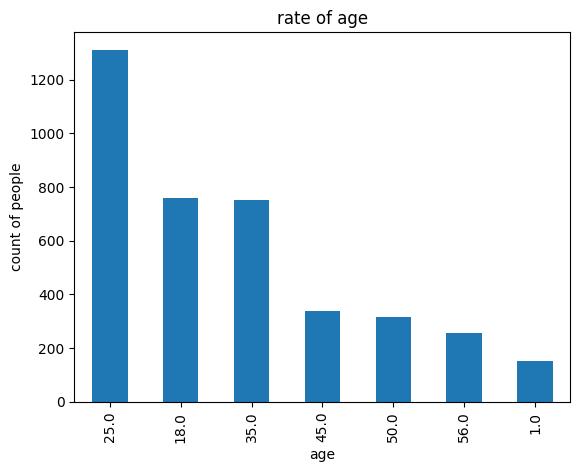

In [21]:
sales_rating["Age"].value_counts().plot(kind="bar")
plt.xlabel("age")
plt.ylabel("count of people")
plt.title("rate of age")
plt.show()

In [22]:
sales_rating=sales_rating.sort_values("Rating",ascending=False)

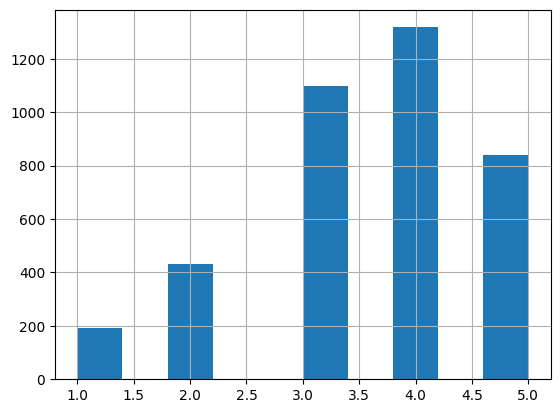

In [23]:
asd=sales_rating.groupby("MovieIDs")["Rating"].max().hist(bins=10)

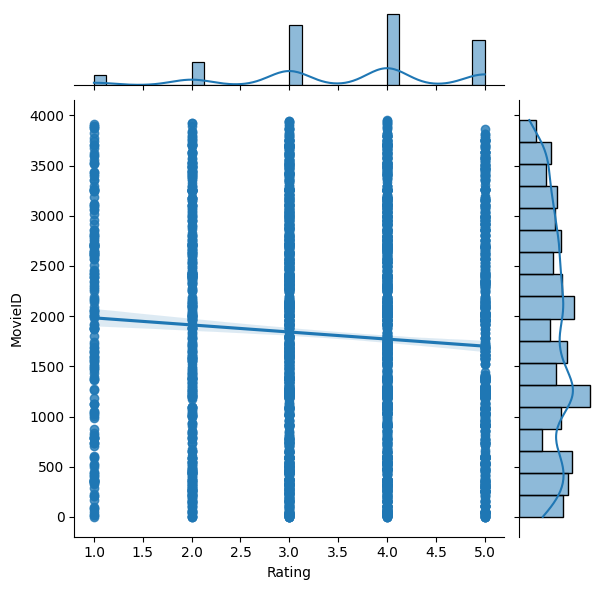

In [24]:
sns.jointplot(x="Rating",y="MovieID",data=sales_rating,kind="reg")

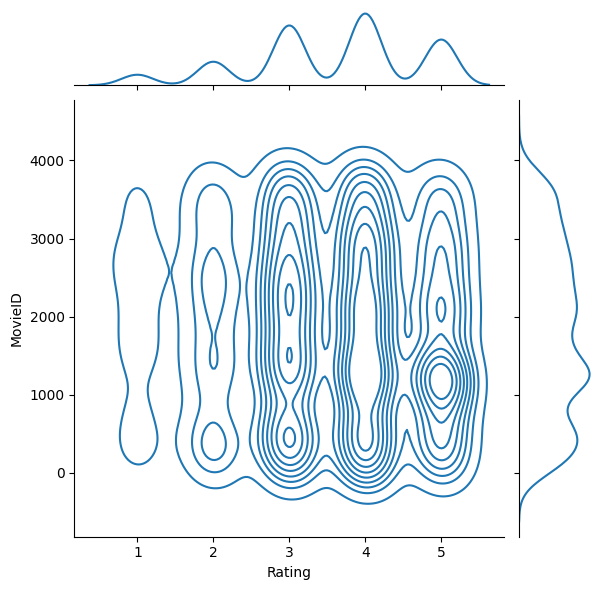

In [25]:
sns.jointplot(x="Rating",y="MovieID",data=sales_rating,kind="kde")

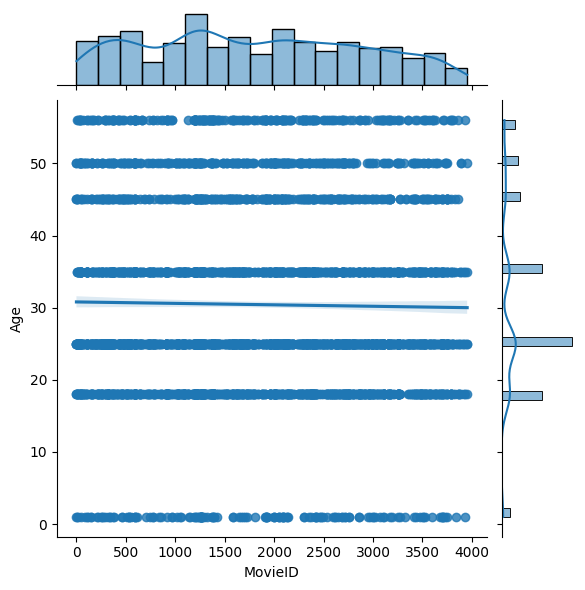

In [26]:
sns.jointplot(x="MovieID",y="Age",data=sales_rating,kind="reg")

<ipython-input-27-28dfdac3c7e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales_rating.corr())


<Axes: >

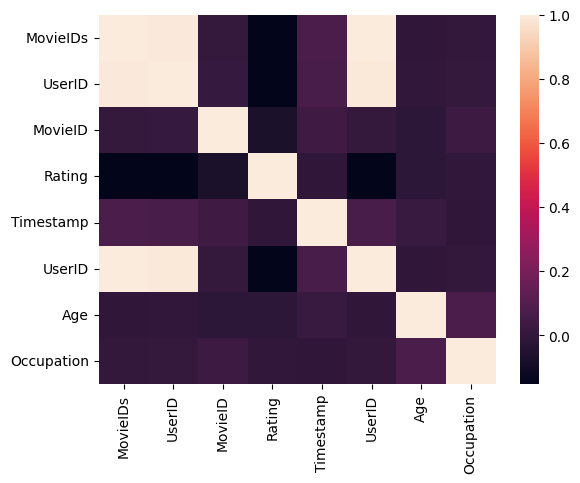

In [27]:
sns.heatmap(sales_rating.corr())

In [28]:
taining_Data=sales_rating[["MovieID","Age","Occupation"]]
testing_Data=sales_rating["Rating"]
x_train,x_test,y_train,y_test=train_test_split(taining_Data,testing_Data,test_size=0.2,random_state=42)

In [29]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
decision_tree.score(x_train,y_train)

0.9745571658615136

In [31]:
decision_tree.predict(x_test)

array([1., 4., 3., 3., 3., 2., 2., 5., 4., 1., 3., 4., 3., 3., 5., 4., 3.,
       5., 2., 1., 3., 4., 4., 3., 3., 4., 5., 5., 2., 4., 3., 5., 3., 2.,
       3., 1., 4., 5., 4., 5., 2., 3., 4., 3., 3., 3., 2., 3., 4., 3., 4.,
       3., 4., 2., 5., 3., 5., 3., 5., 4., 4., 4., 4., 1., 3., 3., 3., 5.,
       3., 4., 3., 5., 4., 5., 3., 3., 4., 3., 5., 3., 2., 3., 4., 4., 1.,
       3., 3., 4., 4., 3., 3., 3., 2., 4., 3., 5., 5., 5., 5., 4., 3., 4.,
       4., 3., 5., 4., 3., 5., 2., 5., 3., 3., 5., 5., 5., 3., 5., 1., 3.,
       4., 2., 4., 5., 3., 1., 2., 4., 1., 4., 4., 4., 4., 3., 3., 2., 5.,
       3., 4., 3., 5., 3., 3., 3., 4., 5., 3., 5., 4., 1., 3., 3., 4., 3.,
       5., 4., 3., 4., 5., 5., 5., 3., 2., 3., 5., 3., 5., 4., 3., 2., 4.,
       4., 3., 3., 5., 4., 5., 5., 3., 5., 3., 4., 3., 1., 2., 4., 3., 3.,
       4., 5., 4., 4., 5., 5., 4., 1., 5., 4., 3., 4., 4., 3., 3., 3., 4.,
       3., 3., 1., 4., 4., 4., 4., 4., 4., 5., 1., 5., 5., 4., 3., 4., 4.,
       5., 5., 4., 3., 4.

In [32]:
print(y_test)

407     2.0
1863    4.0
655     4.0
1264    2.0
3103    4.0
       ... 
3853    5.0
350     4.0
3571    2.0
3153    4.0
3006    5.0
Name: Rating, Length: 777, dtype: float64
